In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
historicalsale=pd.read_csv("E:\工作\百威\(Replace)Historical Sales Volume 2016.1-2019.11.csv")
masterdata=pd.read_csv("E:\工作\百威\(Replace)Product Master Data.csv")
commercialplanning=pd.read_csv("E:\工作\百威\(Replace)Commercial Planning.csv")

In [14]:
historicalsale=historicalsale.dropna(how='all')

In [25]:
from datetime import datetime
historicalsale.Date=historicalsale.Date.map(lambda x: datetime.strptime(x,"%Y/%m/%d"))

In [42]:
historicalsale

,Year,Month,YM,Date,SalesRegion,SKU Code,VolumeHL
0,2016,1,201601,2016-01-02,Heilongjiang,1,2020
1,2016,1,201601,2016-01-02,Heilongjiang,4,79
2,2016,1,201601,2016-01-02,Heilongjiang,9,138
3,2016,1,201601,2016-01-02,Heilongjiang,11,32
4,2016,1,201601,2016-01-02,Heilongjiang,13,95
...,...,...,...,...,...,...,...
53035,2019,11,201911,2019-11-30,Jilin,63,1056
53036,2019,11,201911,2019-11-30,Jilin,64,1831
53037,2019,11,201911,2019-11-30,Jilin,66,43
53038,2019,11,201911,2019-11-30,Jilin,68,1521


In [26]:
historicalsale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53040 entries, 0 to 53039
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         53040 non-null  int64         
 1   Month        53040 non-null  int64         
 2   YM           53040 non-null  int64         
 3   Date         53040 non-null  datetime64[ns]
 4   SalesRegion  53040 non-null  object        
 5   SKU Code     53040 non-null  int64         
 6   VolumeHL     53040 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 3.2+ MB


In [16]:
masterdata

,SKU Code,Brand,Package,Segment
0,1,middle-end 2,Big Bottle,middle-end
1,2,middle-end 2,Big Bottle,middle-end
2,3,middle-end 2,Big Can,middle-end
3,4,middle-end 2,Small Bottle,middle-end
4,5,high-end 2,Big Bottle,high-end
...,...,...,...,...
64,65,middle-end 1,Big Bottle,middle-end
65,66,low-end 1,Big Bottle,low-end
66,67,low-end 3,Big Bottle,low-end
67,68,low-end 1,Big Bottle,low-end


In [11]:
commercialplanning

,YM,SalesRegion,SKU Code,Price,Rebate,PromotionVolume,Discount
0,201601,Heilongjiang,1,NaN,315557,0,15270111
1,201601,Heilongjiang,3,NaN,2499,0,19373
2,201601,Heilongjiang,4,NaN,12866,0,761783
3,201601,Heilongjiang,5,NaN,12397,0,96606
4,201601,Heilongjiang,8,NaN,49817,0,50453
...,...,...,...,...,...,...,...
3975,202003,Jilin,6,316.8,516,0,5923
3976,202003,Jilin,7,336.0,5067,0,57815
3977,202003,Heilongjiang,38,350.0,0,0,4561
3978,202003,Heilongjiang,37,425.4,5588,0,44355


In [17]:
masterdata

,SKU Code,Brand,Package,Segment
0,1,middle-end 2,Big Bottle,middle-end
1,2,middle-end 2,Big Bottle,middle-end
2,3,middle-end 2,Big Can,middle-end
3,4,middle-end 2,Small Bottle,middle-end
4,5,high-end 2,Big Bottle,high-end
...,...,...,...,...
64,65,middle-end 1,Big Bottle,middle-end
65,66,low-end 1,Big Bottle,low-end
66,67,low-end 3,Big Bottle,low-end
67,68,low-end 1,Big Bottle,low-end


## EDA for historical sales data
**hierarchical time series**
1. level 1 SalesRegion
2. level 2 SKU Code

In [41]:
# Heilongjiang; SKU Code=1
HCodes=historicalsale[historicalsale['SalesRegion']=='Heilongjiang']
HCode1=HCodes[HCodes['SKU Code']==1]
HCode1

,Year,Month,YM,Date,SalesRegion,SKU Code,VolumeHL
0,2016,1,201601,2016-01-02,Heilongjiang,1,2020
31,2016,1,201601,2016-01-03,Heilongjiang,1,1544
73,2016,1,201601,2016-01-04,Heilongjiang,1,1992
108,2016,1,201601,2016-01-05,Heilongjiang,1,2592
150,2016,1,201601,2016-01-06,Heilongjiang,1,2214
...,...,...,...,...,...,...,...
52719,2019,11,201911,2019-11-24,Heilongjiang,1,285
52756,2019,11,201911,2019-11-25,Heilongjiang,1,613
52794,2019,11,201911,2019-11-26,Heilongjiang,1,890
52935,2019,11,201911,2019-11-29,Heilongjiang,1,613


**分类逐个预测时某些产品存在数据量不充足的问题**

Text(0.5, 1.0, 'Sales in Heilongjiang Code=1')

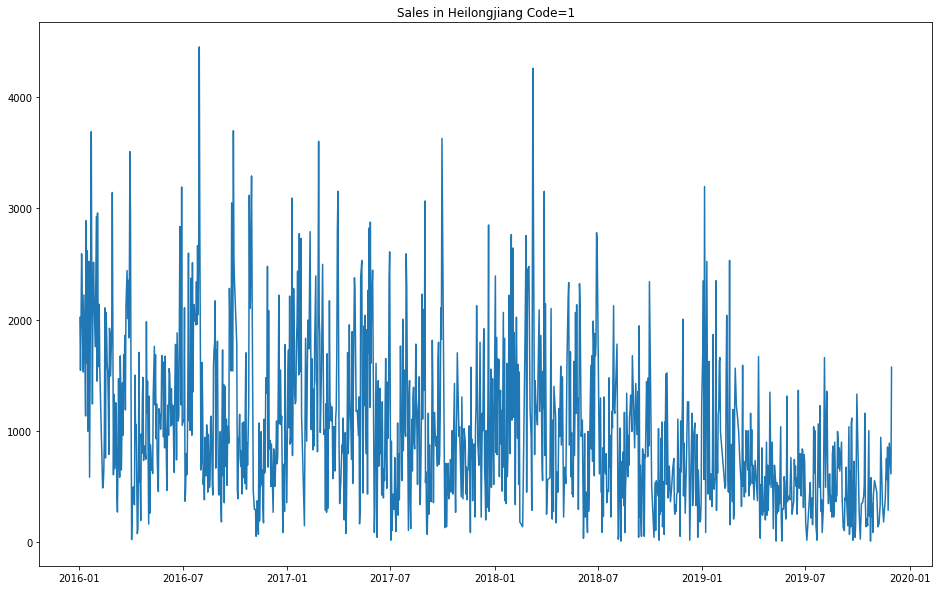

In [40]:
fig1=plt.figure(figsize=(16,10))
ax1=fig1.add_subplot(111)
ax1.plot(HCode1.Date,HCode1.VolumeHL)
ax1.set_title('Sales in Heilongjiang Code=1')

Text(0.5, 1.0, 'Sales in Heilongjiang 2018 Code=1')

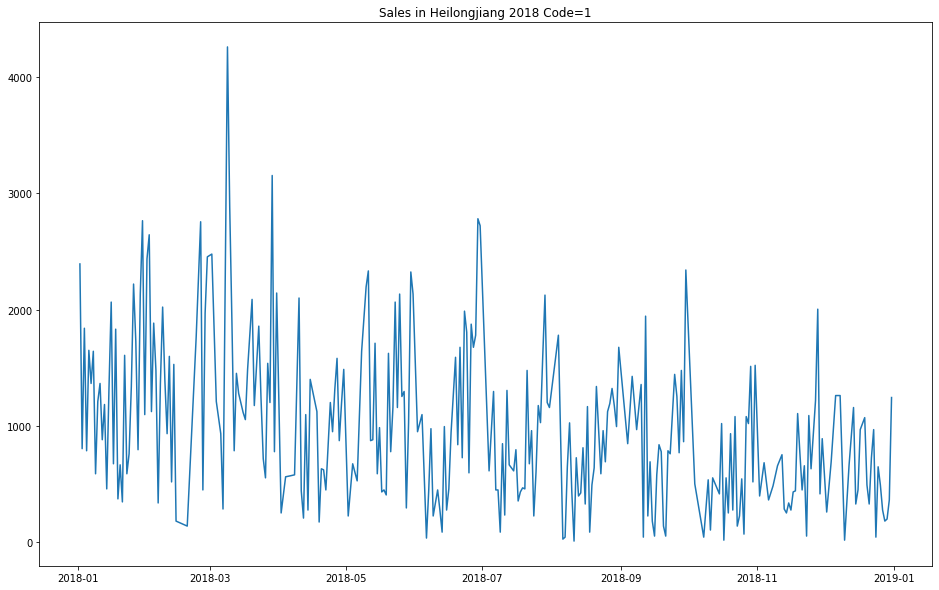

In [39]:
HCode12018=HCode1[HCode1['Year']==2018]
fig2=plt.figure(figsize=(16,10))
ax2=fig2.add_subplot(111)
ax2.plot(HCode12018.Date,HCode12018.VolumeHL)
ax2.set_title("Sales in Heilongjiang 2018 Code=1")

## Finding

**Perioderic**

1. 找到周期性的原因/对应节点--可能是周末或者节日--**添加日历表**

1. 日历表所需字段 星期/节日/节日类型/其他事件(2020预测涉及到新冠？)


In [80]:
#去趋势验证和所处星期数的关系
#利用 后-前来 去除趋势-计算残差
#将残差与星期图-节日图对应--节日或者周六周日的残差最大（热度图）

## EDA
1. 产品销售情况(明星产品)省份销售差异 价格\促销(rebate discount)的影响(品牌，包装，产品档次等方面来探索变量与变量之间以及 变量与目标值之间的关系)
1. 整体趋势+季节性+星期性+节日性 （自制日历表）
2. 缺失值、无意义值识别与处理

In [45]:
commercialplanning.describe()

,YM,SKU Code,Price,Rebate,PromotionVolume,Discount
count,3980.000000,3980.000000,2606.000000,3.980000e+03,3.980000e+03,3.980000e+03
mean,201787.480402,29.161307,110.167421,5.297688e+04,3.300774e+04,9.191866e+05
std,119.430486,18.621739,78.681719,1.089691e+05,1.474714e+05,2.284649e+06
min,201601.000000,1.000000,26.800000,0.000000e+00,0.000000e+00,0.000000e+00
25%,201705.000000,13.000000,69.900000,4.029500e+03,0.000000e+00,4.372250e+04
50%,201805.000000,28.000000,87.400000,1.675250e+04,0.000000e+00,2.032740e+05
75%,201904.000000,43.000000,114.500000,5.591700e+04,5.261000e+03,6.936420e+05
max,202003.000000,69.000000,425.400000,1.836938e+06,2.104206e+06,2.562280e+07


In [52]:
groups1=commercialplanning[commercialplanning['SKU Code']==1][['Price','SalesRegion']].groupby('SalesRegion')

SalesRegion
Heilongjiang    AxesSubplot(0.125,0.125;0.775x0.755)
Jilin           AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

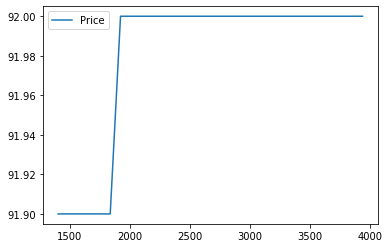

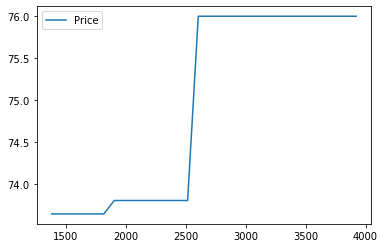

In [53]:
groups1.plot()

## 价格缺失较少 重点研究价格变动期销量是否有明显变化

In [72]:
ccjilin=historicalsale[historicalsale['SalesRegion']=='Jilin']['SKU Code'].value_counts()

<BarContainer object of 52 artists>

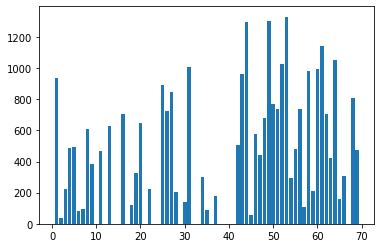

In [73]:
plt.bar(x=cc.index,height=cc)

In [74]:
np.percentile(cc,[0,25,50,75,100])

array([  35.  ,  225.  ,  500.5 ,  815.75, 1330.  ])

In [75]:
cchelongjiang=historicalsale[historicalsale['SalesRegion']=='Heilongjiang']['SKU Code'].value_counts()

<BarContainer object of 36 artists>

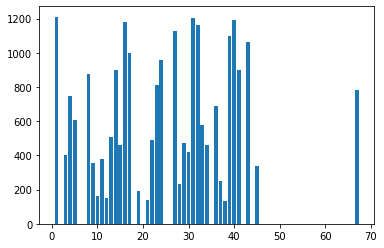

In [77]:
plt.bar(x=cchelongjiang.index,height=cchelongjiang)

In [79]:
np.percentile(cchelongjiang,[0,25,50,75,100])

array([ 132.  ,  373.  ,  591.5 ,  969.25, 1211.  ])